In [ ]:

# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-08-28 07:51:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-08-28 07:51:15 (5.14 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series data

In [ ]:
# import with pandas

import pandas as pd

 # Parse date adn set date column to index
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
df.head()



,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566










#### When you read a CSV file, data is typically read in as strings, including dates. The parse_dates parameter helps convert those strings into datetime objects, which allows you to perform date-specific operations like filtering, sorting, and calculating time differences.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


We've collected the historical price of Bitcoin for the past ~8 years but there's only 2787 total samples.

This is something you'll run into with time series data problems. Often, the number of samples isn't as large as other kinds of data.

For example, collecting one sample at different time frames results in:

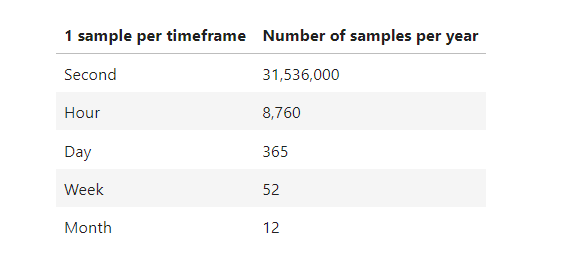







🔑 Note: The frequency at which a time series value is collected is often referred to as seasonality. This is usually mesaured in number of samples per year. For example, collecting the price of Bitcoin once per day would result in a time series with a seasonality of 365. Time series data collected with different seasonality values often exhibit seasonal patterns (e.g. electricity demand behing higher in Summer months for air conditioning than Winter months). For more on different time series patterns, see Forecasting: Principles and Practice Chapter 2.3.

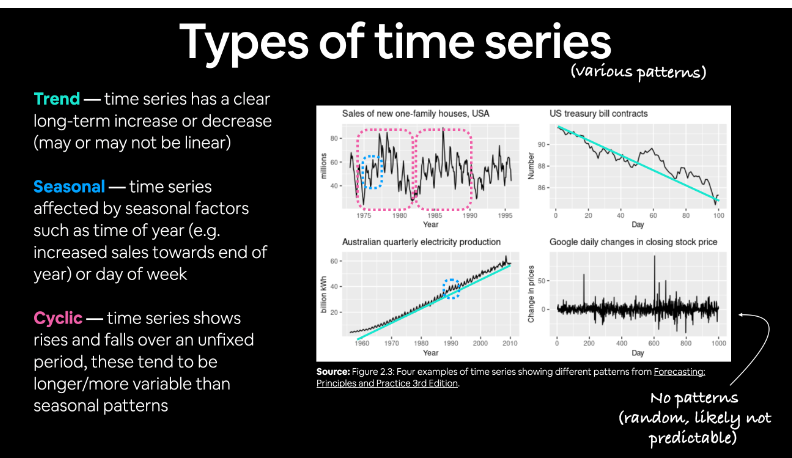

Deep learning algorithms usually flourish with lots of data, in the range of thousands to millions of samples.

In our case, we've got the daily prices of Bitcoin, a max of 365 samples per year.

But that doesn't we can't try them with our data.

To simplify, let's remove some of the columns from our data so we're only left with a date index and the closing price.



In [ ]:

## Only want closing price for each day
bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


let's plot everything we've got

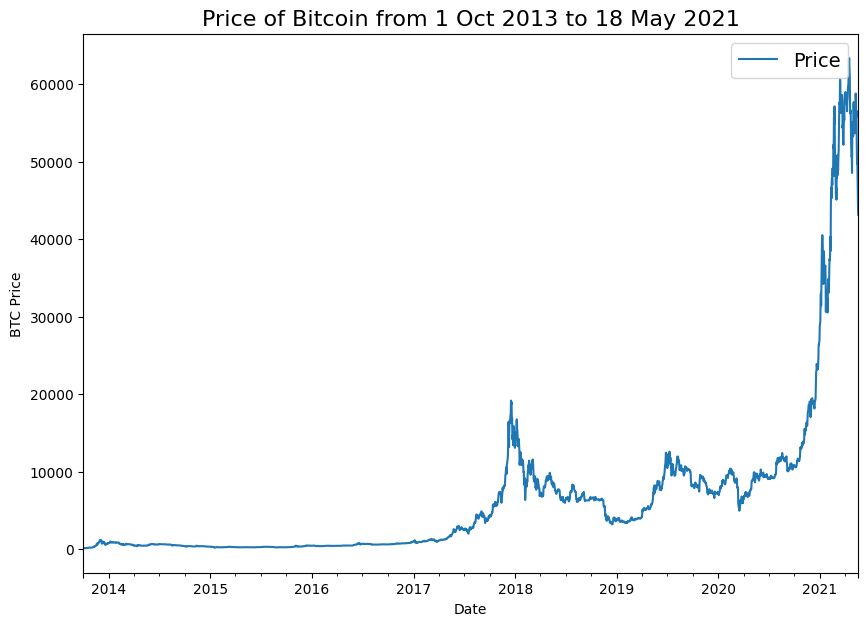

In [ ]:

import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

### Importing time series data with Python's CSV module
If your time series data comes in CSV form you don't necessarily have to use pandas.

You can use Python's in-built csv module. And if you're working with dates, you might also want to use Python's datetime.

Let's see how we can replicate the plot we created before except this time using Python's csv and datetime modules.

In [ ]:
# Importing and formatting historical Bitcoin data with Python

import csv
from datetime import datetime

time_steps=[]
btc_prices=[]

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader=csv.reader(f,delimiter=",") # read in the target CSV
  next(csv_reader) # skip the first line(get rid of the column titles)

  for line in csv_reader:
    time_steps.append(datetime.strptime(line[1],"%Y-%m-%d")) # get the date
    btc_prices.append(float(line[2])) # get the closing price as float






In [ ]:
# View first 10 of each
time_steps[:10],btc_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

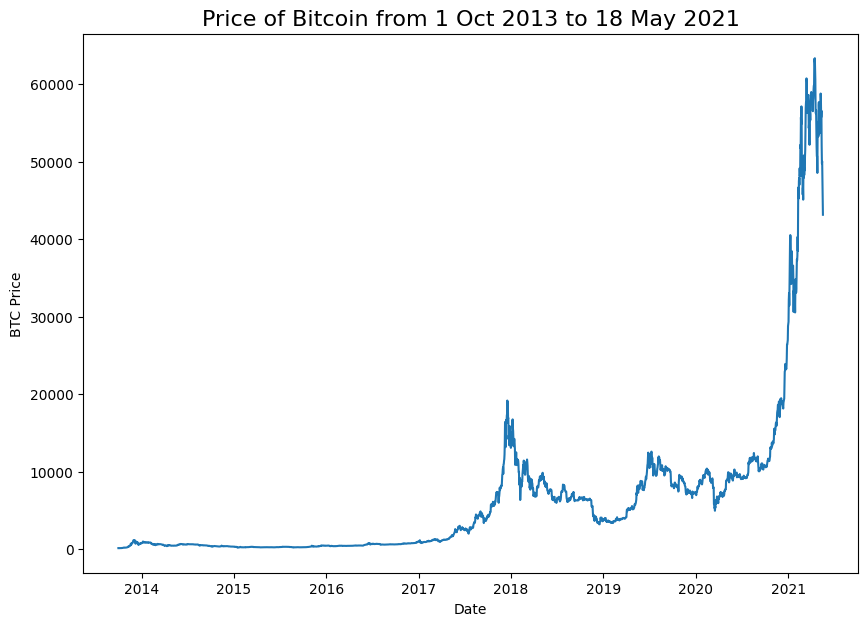

In [ ]:

# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(time_steps, btc_prices)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");



### Format Data Part 1: Creatining train and test sets for time series data

Alrighty. What's next?

If you guessed preparing our data for a model, you'd be right.

What's the most important first step for preparing any machine learning dataset?

Scaling?

No...

Removing outliers?

No...

How about creating train and test splits?

Yes!

Usually, you could create a train and test split using a function like Scikit-Learn's outstanding train_test_split() but as we'll see in a moment, this doesn't really cut it for time series data.

But before we do create splits, it's worth talking about what kind of data we have.

In time series problems, you'll either have univariate or multivariate data.


Can you guess what our data is?

* Univariate time series data deals with one variable, for example, using the price of Bitcoin to predict the price of Bitcoin.
* Multivariate time series data deals with more than one variable, for example, predicting electricity demand using the day of week, time of year and number of houses in a region.

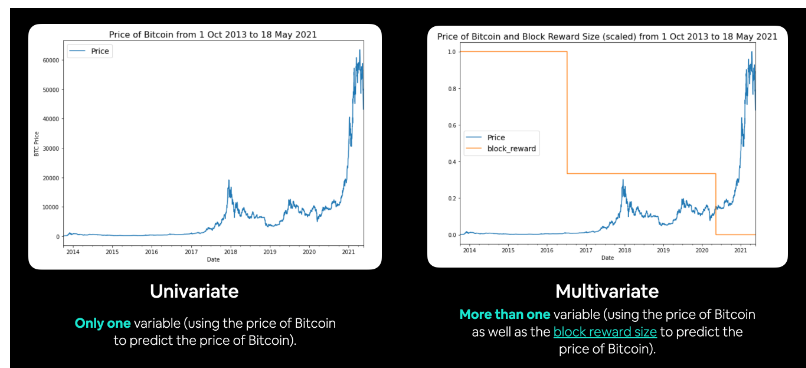

### Create train & test sets for time series (the wrong way)
Okay, we've figured out we're dealing with a univariate time series, so we only have to make a split on one variable (for multivariate time series, you will have to split multiple variables).

How about we first see the wrong way for splitting time series data?

Let's turn our DataFrame index and column into NumPy arrays.

In [ ]:

# Get bitcoin date array

timesteps=bitcoin_prices.index.to_numpy()
prices =bitcoin_prices["Price"].to_numpy()


In [ ]:
timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:




# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))


Looks like the splits worked well, but let's not trust numbers on a page, let's visualize, visualize, visualize!

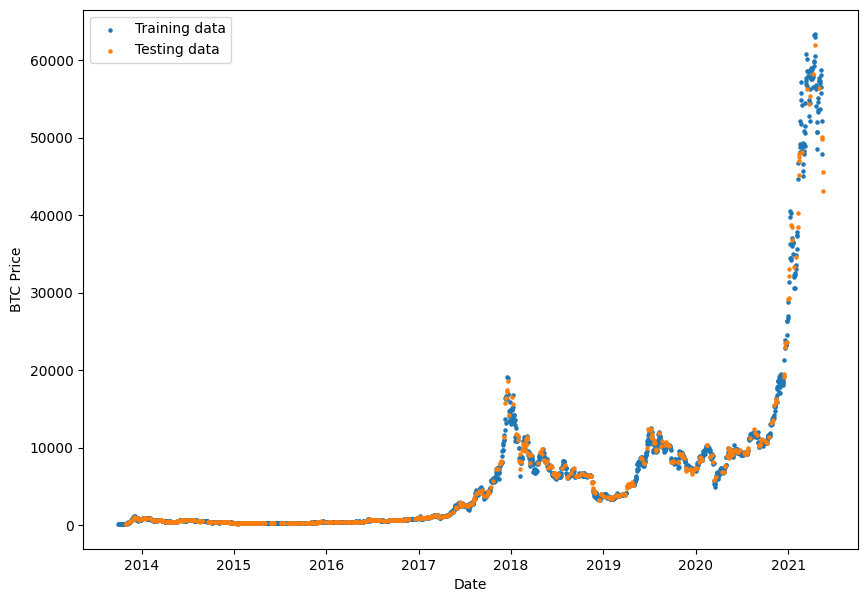

In [ ]:
# Let's plot wrong train and test splits

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Training data")
plt.scatter(X_test,y_test,s=5,label="Testing data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend()
plt.show()

Hmmm... what's wrong with this plot?

Well, let's remind ourselves of what we're trying to do.

We're trying to use the historical price of Bitcoin to predict future prices of Bitcoin.

With this in mind, our seen data (training set) is what?

Prices of Bitcoin in the past.

And our unseen data (test set) is?

Prices of Bitcoin in the future.

Does the plot above reflect this?

No.

Our test data is scattered all throughout the training data.

This kind of random split is okay for datasets without a time component (such as images or passages of text for classification problems) but for time series, we've got to take the time factor into account.

To fix this, we've got to split our data in a way that reflects what we're actually trying to do.

We need to split our historical Bitcoin data to have a dataset that reflects the past (train set) and a dataset that reflects the future (test set).

## Create train & test sets for time series(the right way)
Of course, there's no way we can actually access data from the future.

But we can engineer our test set to be in the future with respect to the training set.

To do this, we can create an abitrary point in time to split our data.

Everything before the point in time can be considered the training set and everything after the point in time can be considered the test set.


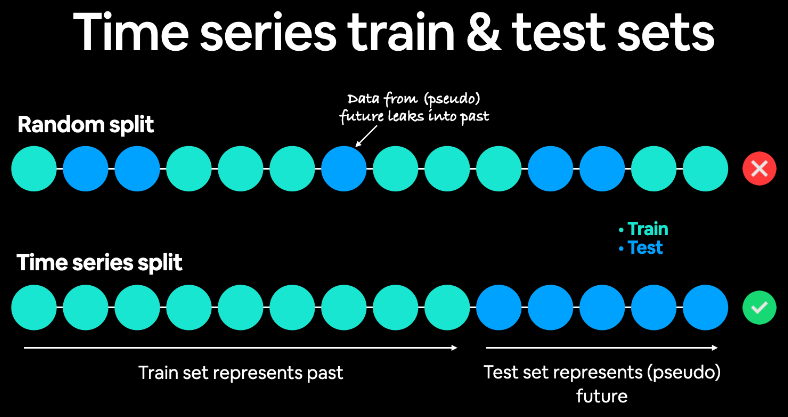

In [ ]:
# Create train and test splits the right way for time series data

split_size=int(0.8*len(prices))  # 80% train,20% test

# Create train data splits

X_train,y_train=time_steps[:split_size],prices[:split_size]

# Create test data splits

X_test,y_test=time_steps[split_size:],prices[split_size:]

len(X_train),len(X_test),len(y_train),len(y_test)

(2229, 558, 2229, 558)


Okay, looks like our custom made splits are the same lengths as the splits we made with `train_test_split.`

But again, these are numbers on a page.

Let's Visualize

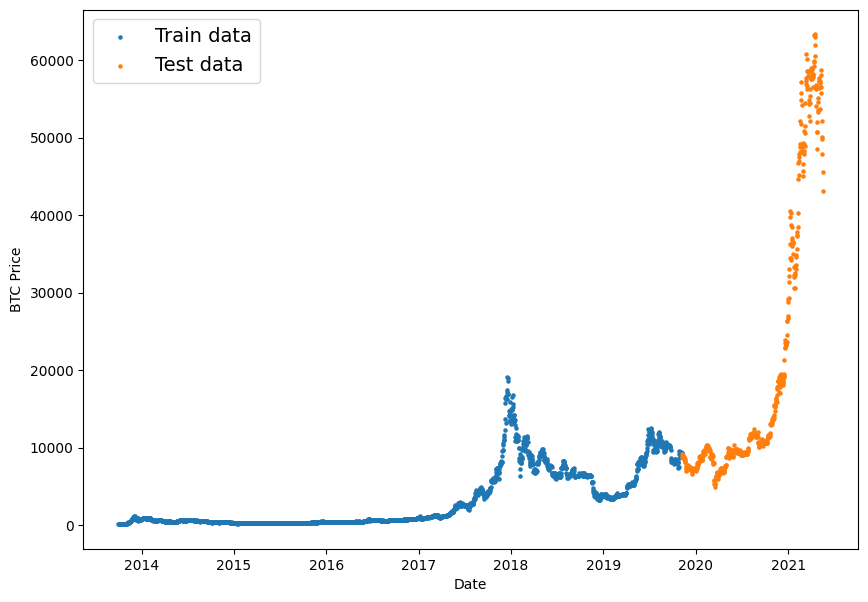

In [ ]:
# Plot correctly made splits

plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()


## **Modelling Experiments**
We can build almost any kind of model for our problem as long as the data inputs and outputs are formatted correctly.

However, just because we can build almost any kind of model, doesn't mean it'll perform well/should be used in a production setting.

We'll see what this means as we build and evaluate models throughout.

Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, **horizon** and **window**.

* horizon = number of timesteps to predict into future
* window = number of timesteps from past used to predict **horizon**

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

Now, The model experiments i am going to perform:-

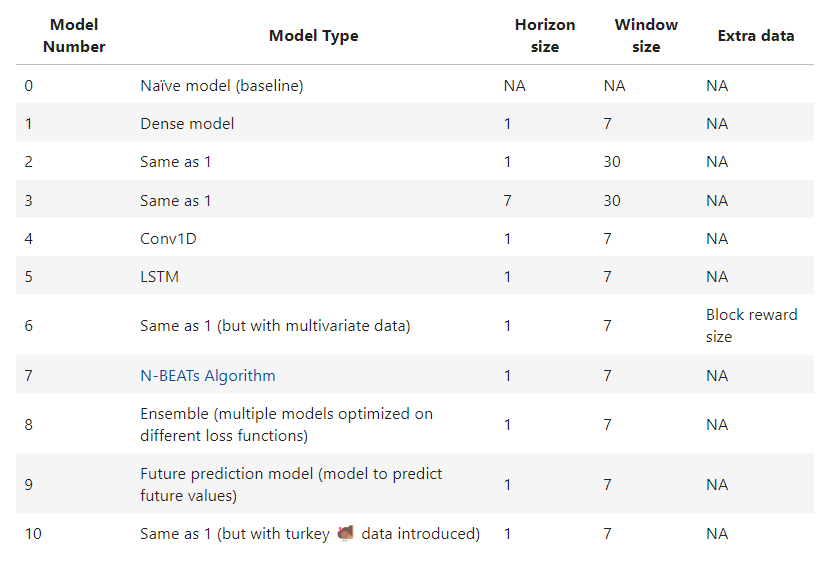

## Model 0: Naïve forecast (baseline)
Let's start with a baseline.

One of the most common baseline models for time series forecasting, the naïve model (also called the naïve forecast), requires no training at all.

That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

The formula looks like this:

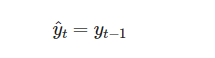



The prediction at timestep `t (y-hat)` is equal to the value at timestep `t-1 (the previous timestep)`.

In [ ]:
# Create a naive forecast

naive_forecast=y_test[:-1] # Naive forecast equals every value excluding the last value

naive_forecast[:10],naive_forecast[-10:] # View first 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

### Define the plot function:

In [ ]:

# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)



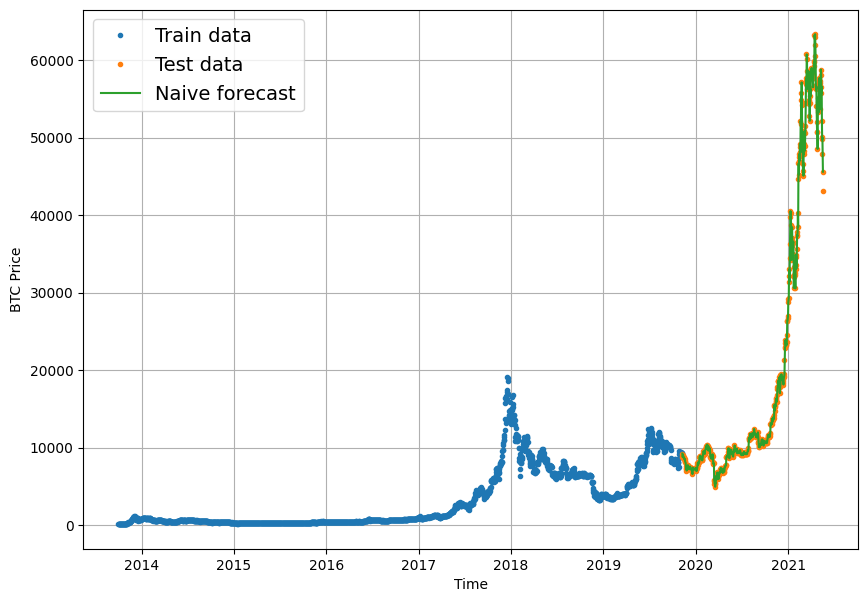

In [ ]:


#Plot naive forecast

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format="-",label="Naive forecast")


The naive forecast looks like it's following the data well.

Let's zoom in to take a better look.

We can do so by creating an offset value and passing it to the `start` parameter of our `plot_time_series()` function.

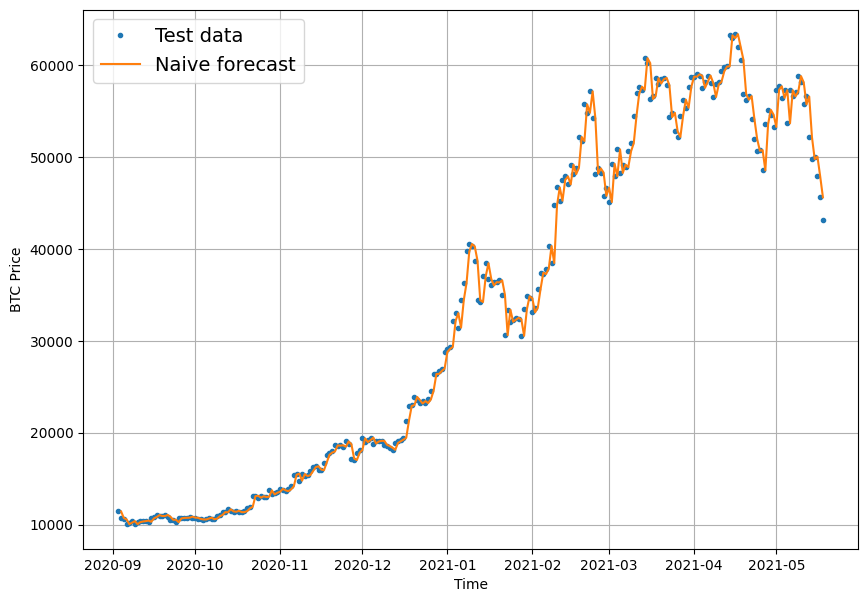

In [ ]:

plt.figure(figsize=(10,7))
offset=300 # offset the value by 300 timesteps

plot_time_series(timesteps=X_test,values=y_test,start=offset,label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format="-",start=offset,label="Naive forecast")

When we zoom in we see the naïve forecast comes slightly after the test data. This makes sense because the naive forecast uses the previous timestep value to predict the next timestep value.

Forecast made. Time to evaluate it.

## Evaluating a time series model

  1. Scale-dependent errors
     
     * MAE(mean absolute error)
     * RMSE(root mean absolute error)
  2. Percentage errors
    
     * MAPE(mean absolute percentage error)
     * sMAPE(symmetric mean absolute percentage error)
  
  3.  Scaled errors
      
      * MASE(mean absolute scaled error)
  


In [ ]:
# Let's get tensorflow
!pip install tensorflow==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

### Defining MASE function

In [ ]:
def mean_absolute_scaled_error(y_true,y_pred):

  """
  Implement MASE(Assuming no seasonality of data)
  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forcast(no seasonalitty)

  mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

the naïve model should achieve an MASE of 1 (or very close to 1). Any model worse than the naïve forecast will achieve an MASE of >1 and any model better than the naïve forecast will achieve an MASE of <1.

Let's put each of our different evaluation metrics together into a function.

Looking good! How about we test our function on the naive forecast?

In [ ]:
def mean_absolute_error(y_true,y_pred):
  return tf.reduce_mean(tf.abs(y_true-y_pred))

In [ ]:
def mean_squared_error(y_true,y_pred):
  return tf.reduce_mean(tf.square(y_true-y_pred))

In [ ]:
def root_mean_squared_error(y_true,y_pred):
  return tf.sqrt(mean_squared_error(y_true,y_pred))

In [ ]:
def mean_absolute_percentage_error(y_true,y_pred):
  return 100*tf.reduce_mean(tf.abs(y_true-y_pred)/y_true)

In [ ]:

import tensorflow as tf

def evaluate_preds(y_true, y_pred):
    # Cast the true and predicted values to float32
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = mean_absolute_error(y_true, y_pred).numpy()
    mse = mean_squared_error(y_true, y_pred).numpy()
    mape = mean_absolute_percentage_error(y_true, y_pred).numpy()
    rmse = root_mean_squared_error(y_true, y_pred).numpy()
    mase = mean_absolute_scaled_error(y_true, y_pred).numpy()
  # Assuming you have this custom function defined elsewhere

    return {
        "mae": mae ,
        "mse": mse,
        "rmse": rmse,
        "mape": mape,
        "mase": mase  # Assuming mase is calculated similarly
    }

# Example usage:
# naive_result = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)


In [ ]:
mase=mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast)
mase.numpy()

0.9995699939182624

In [ ]:
naive_results=evaluate_preds(y_true=y_test[1:],y_pred=naive_forecast)


naive_results


{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [ ]:

# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
HORIZON=1

In [ ]:

# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels



In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)

In [ ]:
len(full_windows),len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:


# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]



tf.keras.preprocessing.timeseries_dataset_from_array(). Just like ours, it takes in an array and returns a windowed dataset. It has the benefit of returning data in the form of a tf.data.Dataset instance (we'll see how to do this with our own data later).

## Turning windows into training and test sets

Time to turn our windows into training and test splits.

We could've windowed our existing training and test splits, however, with the nature of windowing (windowing often requires an offset at some point in the data), it usually works better to window the data first, then split it into training and test sets.

Let's write a function which takes in full sets of windows and their labels and splits them into train and test splits.

In [ ]:
# Make the train/test splits

def make_train_test_splits(windows,labels,test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size=int(len(windows)*(1-test_split))
  train_windows=windows[:split_size]
  train_labels=labels[:split_size]

  test_windows=windows[split_size:]
  test_labels=labels[split_size:]

  return train_windows,test_windows,train_labels,test_labels

Let's test this function

In [ ]:

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

 the default split of 80% training data and 20% testing data (this split can be adjusted if needed).

How do the first 5 samples of the training windows and labels looks?

In [ ]:
train_windows[:5],train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:


# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint

Because our model's performance will fluctuate from experiment to experiment, we'll want to make sure we're comparing apples to apples.

we want to compare each model's best performance against each model's best performance.

To take of this, we'll implement a `ModelCheckpoint` callback.

The `ModelCheckpoint` callback will monitor our model's performance during training and `save the best model `to file by setting `save_best_only=True`.

Let's write  a small function to create a ModelCheckpoint callback which saves a model to specified filename.

In [ ]:

import os
# Create a function to implement a ModelCheckpoint callback with a specified filename

def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name)+ ".keras",verbose=0,save_best_only=True)

# Model 1: Dense model (window = 7, horizon = 1)

We're going to start by keeping it simple, model_1 will have:

* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs

Since the model runs so fast ( it's because the number of samples we have isn't massive) we might as well train for more.

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model

model_1=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON,activation="linear"),

],name="model_1_dense")

# Compile model

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit model

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]
            )

Epoch 1/100
18/18 [==============================] - 1s 18ms/step - loss: 4020.0337 - mae: 4020.0337 - val_loss: 13390.0645 - val_mae: 13390.0645
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 833.6983 - mae: 833.6983 - val_loss: 3553.4797 - val_mae: 3553.4797
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 324.6250 - mae: 324.6250 - val_loss: 1204.9978 - val_mae: 1204.9978
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 200.8656 - mae: 200.8656 - val_loss: 1079.5416 - val_mae: 1079.5416
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 178.6492 - mae: 178.6492 - val_loss: 981.2397 - val_mae: 981.2397
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 181.2356 - mae: 181.2356 - val_loss: 1001.2165 - val_mae: 1001.2165
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 176.1420 - mae: 176.1420 - val_loss: 953.3912 - val_mae: 953.3912
Epoch 8/100


Because of the small size of our data (less than 3000 total samples), the model trains very fast.

Let's evaluate it.

In [ ]:
# Evaluate model on test data

model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 617.7690 - mae: 617.7690


[617.76904296875, 617.76904296875]

In [ ]:
# Load in saved best performance model_1 and evaluate on test data
model_1=tf.keras.models.load_model("model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.3188 - mae: 567.3188


[567.31884765625, 567.31884765625]

## Making forecasts with a model(on the test dataset)

Since we're going to be running more modelling experiments, let's write a function which:

* Takes in a trained model (just like model_1)

* Takes in some input data (just like the data the model was trained on)

* Passes the input data to the model's predict() method

* Returns the predictions

In [ ]:
def make_preds(model,input_data):
  """
  Uses a trained model to make predictions on input data.
  """
  forecast=model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

Let's use `make_preds()` and see how it goes

In [ ]:
# make predictions using model_1 on the test dataset and view the results
model_1_preds=make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8835.85 , 8771.619, 8976.832, 8791.276, 8759.734, 8655.533,
        8664.278, 8548.579, 8410.565, 8504.442], dtype=float32)>)

🔑 Note: With these outputs, our model isn't forecasting yet. It's only making predictions on the test dataset. Forecasting would involve a model making predictions into the future, however, the test dataset is only a pseudofuture.

let's use the `evaluate_preds()` we created before to compare them to the ground truth.

In [ ]:
test_labels.shape

(556, 1)

In [ ]:
# Evalaute preds

model_1_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_1_preds)
model_1_results

{'mae': 567.31885,
 'mse': 1161779.6,
 'rmse': 1077.8588,
 'mape': 2.551507,
 'mase': 0.9966221}

Did it beat the naive forecast?


In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

It looks like our naïve model beats our first deep model on nearly every metric.

Let's use the `plot_time_series()` function to `plot model_1_preds` against the `test data`.

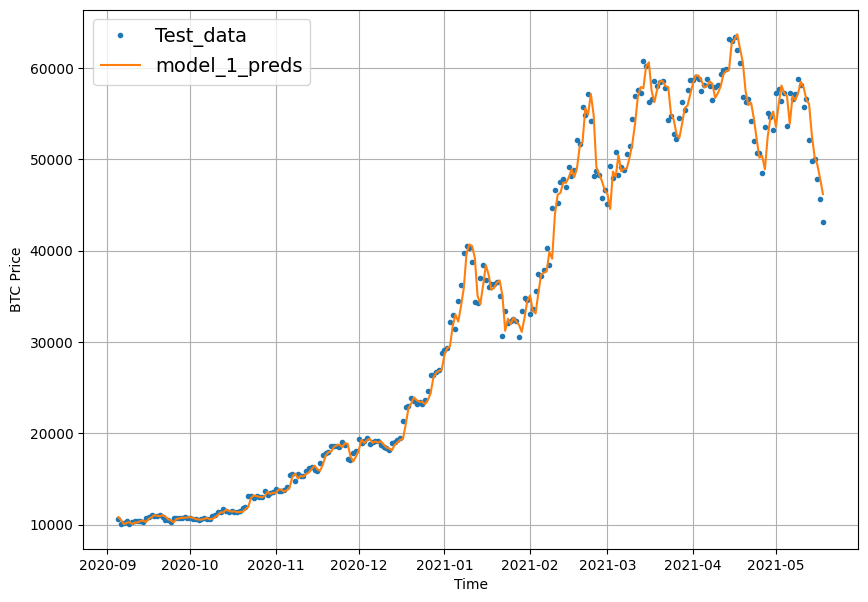

In [ ]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_1_preds,start=offset,format="-",label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

Let's continue our modelling experiments.

We'll keep the previous model architecture but use a window size of 30.

In other words, we'll use the previous 30 days of Bitcoin prices to try and predict the next day price.

In [ ]:
HORIZON=1 # predict one step at time
WINDOW_SIZE=30 # use 30 timesteps in the past


In [ ]:
# Make windowed data with data with appropriate horizon and window sizes
full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2757, 2757)

In [ ]:
# Make train and test windows
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2205, 552, 2205, 552)

Data prepared!

Now let's construct ` model_2`, a model with same architecture as `model_1` as well as the same training routine.

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Let's evaluate our model's performance

In [ ]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 656.5447


656.5447387695312

Loading the best performance of `model_2` which was saved to `ModelCheckpoint` callback.

In [ ]:
# Load in best performing model

model_2=tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 596.0723


596.072265625

 let's make some `predictions with model_2` and then evaluate it.



In [ ]:

# get forecast predictions
model_2_preds=make_preds(model_2,
                         input_data=test_windows)

# Evaluate results for model 2 predictions

model_2_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_2_preds)

model_2_results

18/18 [==============================] - 0s 2ms/step


{'mae': 596.07214,
 'mse': 1235884.8,
 'rmse': 1111.7035,
 'mape': 2.7012267,
 'mase': 1.0419399}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

It looks like model_2 performs worse than the naïve model as well as model_1!

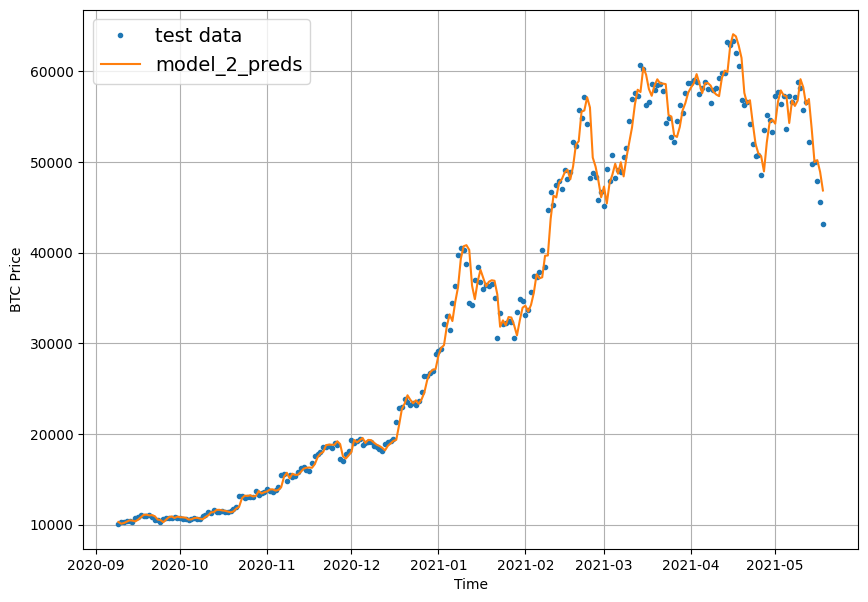

In [ ]:
offset=300
plt.figure(figsize=(10,7))

# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,start=offset,format="-",label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)
Let's try and predict 7 days ahead given the previous 30 days.

First, update the HORIZON and WINDOW_SIZE variables and create windowed data.

In [ ]:
HORIZON=7
WINDOW_SIZE=30

full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2751, 2751)

split the full dataset windows into training and test splits

In [ ]:
train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2200, 551, 2200, 551)

Now let's build ,compile ,fit and evaluate a model

In [ ]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# Evalute the model
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1394.9817


1394.981689453125

In this case, the error will be higher because we're predicting 7 steps at a time.

Let's make prediction with ` model_3` using `make_preds()` function and evaluate them using `evaluate_preds()` function.

In [ ]:
# The predictions are going to be 7 steps at a time(this is the HORIZON size)
model_3_preds=make_preds(model_3,
                         input_data=test_windows)

18/18 [==============================] - 0s 3ms/step


In [ ]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9197.847, 9073.912, 9127.456, 9119.63 , 8951.389, 9039.239,
        9195.368],
       [8916.348, 8694.699, 8917.874, 8842.858, 8712.412, 8823.548,
        8811.483],
       [8658.222, 8583.779, 8734.99 , 8845.869, 8452.823, 8765.264,
        8663.825],
       [8631.527, 8698.35 , 8816.763, 8880.544, 8530.089, 8806.723,
        8838.457],
       [8629.219, 8624.894, 8702.037, 8610.595, 8473.898, 8614.19 ,
        8877.413]], dtype=float32)>

In [ ]:
# Calculate model_3 results


model_3_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_3_preds)
model_3_results

{'mae': 1394.9816,
 'mse': 6076881.0,
 'rmse': 2465.133,
 'mape': 6.2041974,
 'mase': 2.4822915}

Time to visualize

 Here , prediction evaluation metrics were multi-dimensional , wonder how it will look if we plot them?

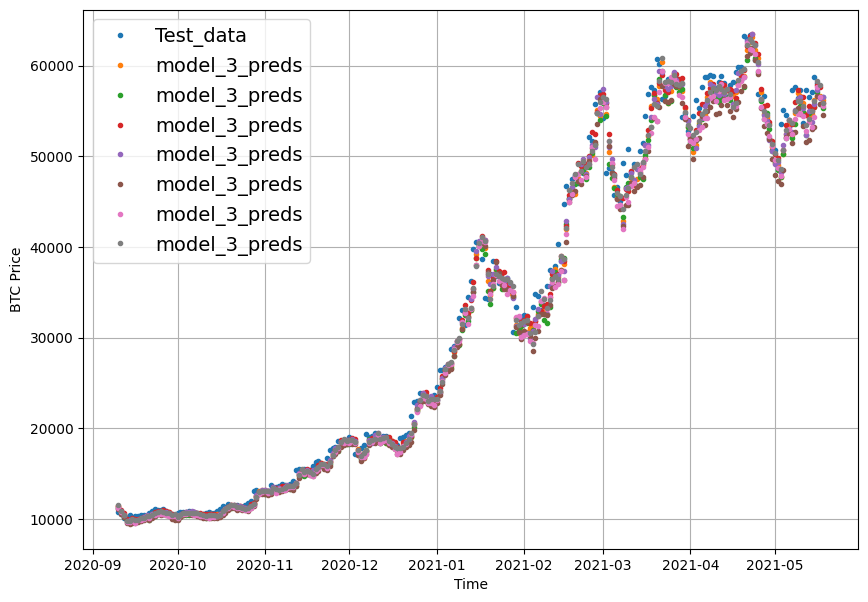

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")


When we try to plot our multi-horizon predicts, we get a funky looking plot.


We can fix this by aggregating our model's predictions.


🔑  Aggregating 7-day model predictions into a single value (e.g., the mean) simplifies visualization but sacrifices the detailed information originally provided for each day.


 While this approach makes it easier to plot, it reduces the richness of the data that the model was designed to predict across multiple days.

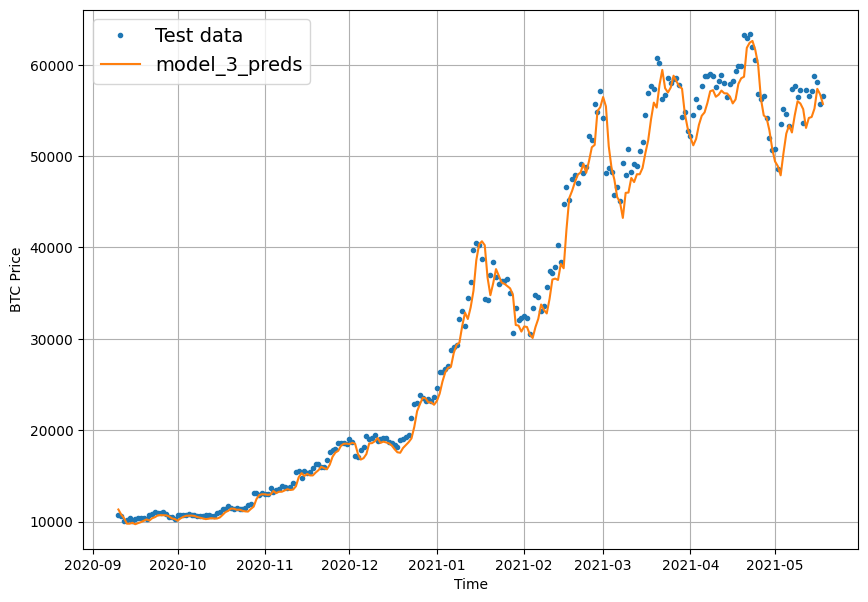

In [ ]:
offset=300
plt.figure(figsize=(10,7))
# Plot the model_3_preds by aggregating them

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,
                 label="Test data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds,axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

## Which of the  models is performing best so far?

so far, i have trained 3 models which use the same architecture but use different data inputs



<Axes: >

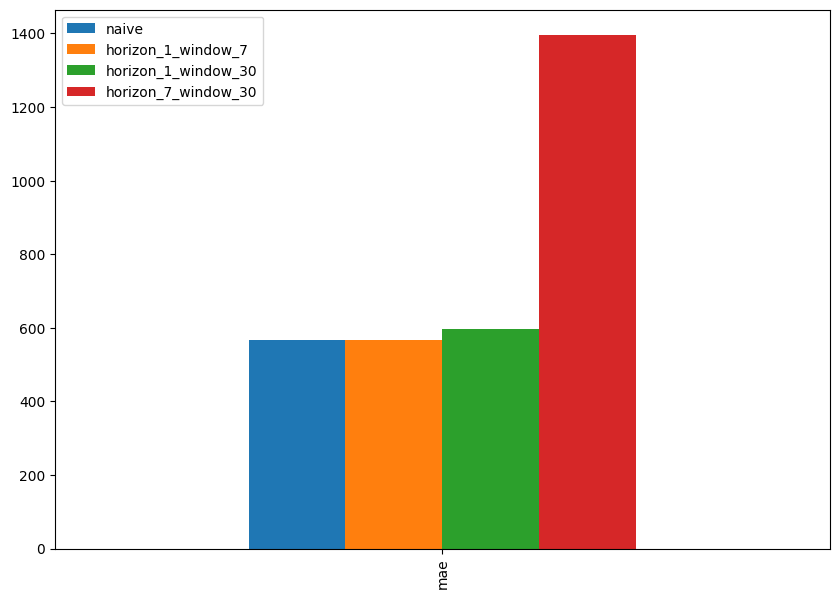

In [ ]:
pd.DataFrame({"naive":naive_results["mae"],
             "horizon_1_window_7":model_1_results["mae"],
             "horizon_1_window_30":model_2_results["mae"],
             "horizon_7_window_30":model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7),kind="bar")

naïve model is performing best (it's very hard to beat a naïve model in open systems) but the dense model with a horizon of 1 and a window size of 7 looks to be performing cloest.



Naive results are so good due to presence of `autocorrelation` in the data.

## Model 4 : Conv1D

In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day (in seq2seq terms this is called a many to one problem).

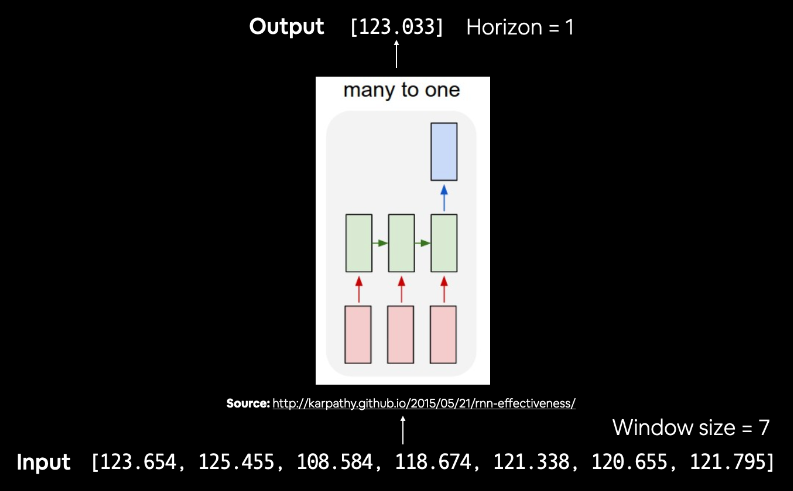

let's recreate our datasets

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
# Create windowed dataset

full_windows,full_labels=make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [ ]:
# create train/test splits

train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

The Conv1D layer in TensorFlow takes an input of: `(batch_size, timesteps, input_dim)`.

the `batch_size`(by default this is 32) is handled for us but the other values will be:

* `timesteps=WINDOW_SIZE` - the `timesteps` is also often referred to as `features` , our features are the previous `WINDOW_SIZE` values of Bitcoin

* `input_dim = HORIZON` - our model views `WINDOW_SIZE`(one week) worth of data at a time to predict `HORIZON`(one day)




Right now, our data has the `timesteps` dimension ready but have to adjust it to have the `input_dim` dimension.

In [ ]:
# Check data samples shapes
train_windows[0].shape # return (window_size)

(7,)

To fix this, we could adjust the shape of all of our `train_windows` or we could use a `tf.keras.layers.Lamdba` (called a Lambda layer) to do this for us in our model.

The lambda layer wraps a function into a layer which can be used with a model

Let's try it out.

In [ ]:
# before passing data to the Conv1D layer, we have to reshape it .

x=tf.constant(train_windows[0])

expand_dims_layer=layers.Lambda(lambda x:tf.expand_dims(x,axis=-1))
print(f"Orignal shape:{x.shape}") # (Window_size)
print(f"Expanded shape:{expand_dims_layer(x).shape}") #(Window_size,input_dim)
print(f"Orignal values with expanded shape:\n {expand_dims_layer(x)}")

Orignal shape:(7,)
Expanded shape:(7, 1)
Orignal values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


Now we've got a Lambda layer, let's build, compile, fit and evaluate a Conv1D model on our data.


🔑 Note: If you run the model below without the Lambda layer, you'll get an input shape error (one of the most common errors when building neural networks).


The Lambda layer appears the same as any other regular layer.

In [ ]:
pip install tensorflow==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set the seed for reproducibility
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),  # Reshape inputs for Conv1D
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])




In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#

# Load the model without optimizer parameters
model_4_loaded = tf.keras.models.load_model("model_experiments/model_4_conv1D.keras",safe_mode=False)

# Evaluate the loaded model
model_4_loaded.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 572.0452


572.0452270507812

In [ ]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 603.5565


603.5565185546875

In [ ]:
# The predictions are going to be 7 steps at a time(this is the HORIZON size)
model_4_preds=make_preds(model_4,
                         input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_4_preds[:5].numpy()

array([8806.885 , 8712.6045, 8929.898 , 8691.979 , 8659.038 ],
      dtype=float32)

In [ ]:

train_windows,test_windows,train_labels,test_labels=make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

## Model 5: RNN(LSTM)

Let's reuse the same data we used for the Conv1D model, except this time we'll create an LSTM-cell powered RNN to model our Bitcoin data.


The `tf.keras.layers.LSTM()` layer takes a tensor with [batch, timesteps, feature] dimensions.
As mentioned earlier, the `batch` dimension gets taken care of for us but our data is currently only has the `feature `dimension `(WINDOW_SIZE)`.



To fix this, just like we did with the `Conv1D` model, we can use a `tf.keras.layers.Lambda() `layer to adjust the shape of our input tensors to the LSTM layer.

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API

inputs=layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x=layers.LSTM(128,activation="relu")(x)
output=layers.Dense(HORIZON)(x)
model_5=tf.keras.Model(inputs,output,name="model_5_lstm")


# Compile model

model_5.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())



model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)]
            )

In [ ]:
# make predicitons with our LSTM model

model_5_preds=make_preds(model_5,test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9053.58  , 8899.604 , 9013.149 , 8892.211 , 8843.223 , 8799.585 ,
       8774.732 , 8643.729 , 8546.946 , 8577.9375], dtype=float32)>

In [ ]:
# evaluate model 5 preds
model_5_results=evaluate_preds(y_true=tf.squeeze(test_labels),
                               y_pred=model_5_preds)

In [ ]:
model_5_results

{'mae': 619.1404,
 'mse': 1340558.5,
 'rmse': 1157.825,
 'mape': 2.8240583,
 'mase': 1.0876582}

it seems even with an LSTM-powered RNN weren't able to beat the  naive models results

## Make a multivariate time series


If predicting the price of Bitcoin using the price of Bitcoin hasn't worked out very well, maybe giving the  model more information may help.

Let's try and see if the `Bitcoin block reward size ` adds any predictive power to our model(s).


What is the Bitcoin block reward size?

The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block.

At its inception, the Bitcoin block reward size was 50.

But every four years or so, the Bitcoin block reward halves.






Let's encode this information into our time series data and see if it helps a model's performance.

In [ ]:
#let's make a multivariate time series

bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


First, to create variables for the different block reward sizes as well as the dates they came into play.


The following block rewards and dates were sourced from [cmcmarkets.com](https://www.cmcmarkets.com/)

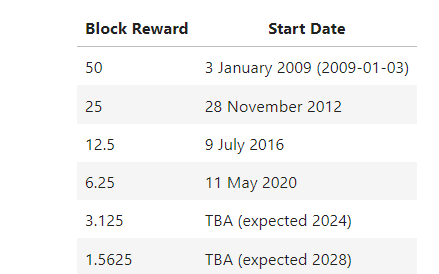

In [ ]:
# block reward values

# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)

block_reward_2_datetime=np.datetime64("2012-11-28")
block_reward_3_datetime=np.datetime64("2016-07-09")
block_reward_4_datetime=np.datetime64("2020-05-11")

In [ ]:
# Get date indexes for when to add in different block dates

block_reward_2_days=(block_reward_3_datetime-bitcoin_prices.index[0]).days
block_reward_3_days=(block_reward_4_datetime-bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2414)

Now add another feature to the dataset `block_reward` (this gets lower over time so it may lead to increasing prices of Bitcoin)

In [ ]:
# Add block_reward column

bitcoin_prices_block=bitcoin_prices.copy() # copy of the orignal dataframe

bitcoin_prices_block["block_reward"]=None

# set values of block_reward column(it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4
bitcoin_prices_block.head()




,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block[1500:1550]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5
2017-11-14,6666.27125,12.5
2017-11-15,6867.42625,12.5
2017-11-16,7259.30000,12.5
2017-11-17,7924.18250,12.5


In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


<Axes: xlabel='Date'>

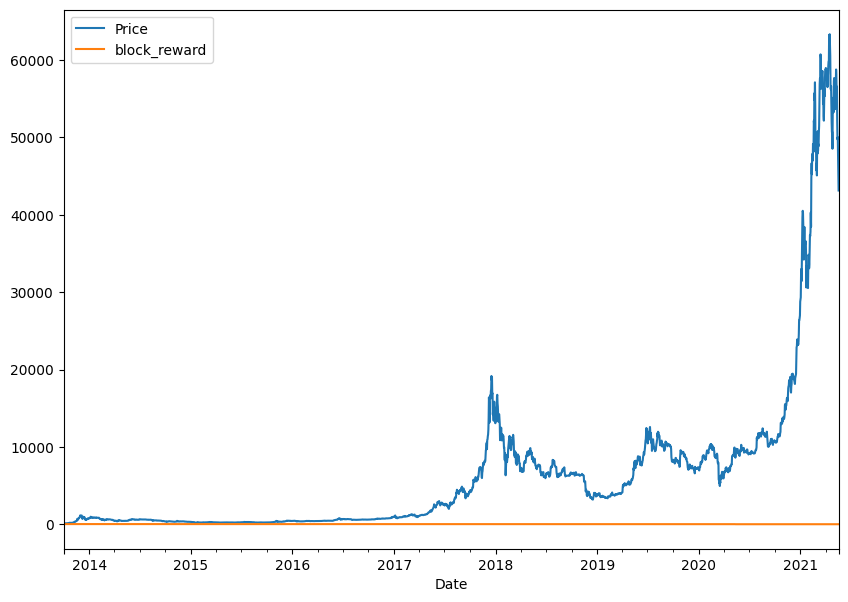

In [ ]:
# plot the block reward/price over time

bitcoin_prices_block.plot(figsize=(10,7))


 this is happening due to difference in scale .

<Axes: xlabel='Date'>

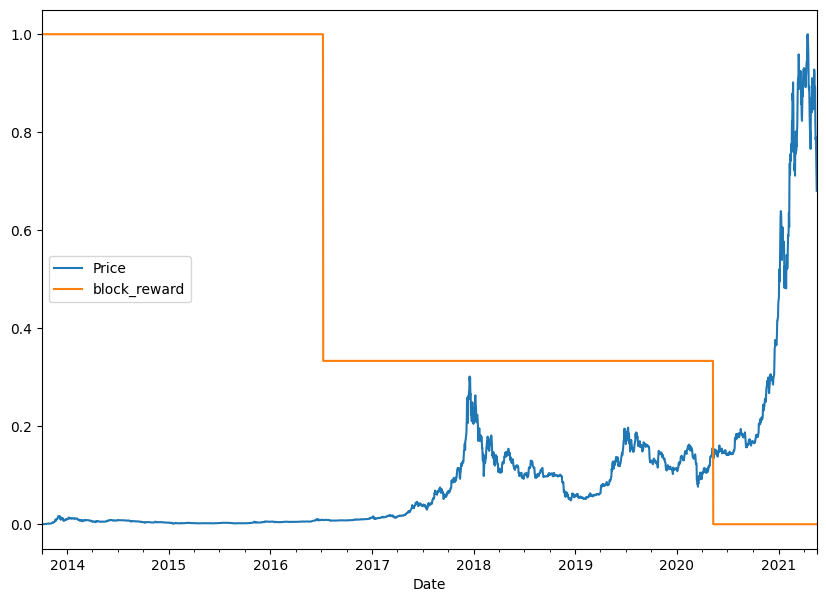

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1

from sklearn.preprocessing import minmax_scale

scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                   columns=bitcoin_prices_block.columns,
                                   index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))


## Maing a windowed dataset with pandas

Previously, we used some custom made functions to window our `univariate` time series.



However, since we've just added another variable to our dataset, these functions won't work.



Since our data is in a pandas DataFrame, we can leverage the `pandas.DataFrame.shift()` method to create a windowed `multivariate` time series.


The `shift()1` method ossets an index by a specific number of period

Let's see it in action.


In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

In [ ]:
# make a copy of the bitcoin historical data with block reward features
bitcoin_prices_windowed=bitcoin_prices_block.copy()

# add windowed columns

for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price{i+1}"]=bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


Remove the `NAN` using pandas `dropna()` method.

In [ ]:
# Let's create X & y, remove the NAN and convert to float32 to prevent tensorflow erors

X=bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head(
)

,Price
Date,
2013-10-08,123.032997
2013-10-09,124.049004
2013-10-10,125.961159
2013-10-11,125.279663
2013-10-12,125.927498


# Train and Test split

In [ ]:
# make train and test split

split_size=int(len(X)*0.8)
X_train,X_test=X[:split_size],X[split_size:]
y_train,y_test=y[:split_size],y[split_size:]
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

Time to build a model

## Model 6 : Dense(multivariate time series)


To keep things simple, let's the `model_1` architecture and use it to train and make predictions on the  multivariate time series data.

By replicating the ` model_1 ` architecture we'll be able to see whether or not adding the block reward feature improves or detracts from model performance.

In [ ]:
tf.random.set_seed(42)

# make multivariate time series model

model_6=tf.keras.Sequential(
  [
      layers.Dense(128,activation="relu"),
      layers.Dense(HORIZON)
  ],name="model_6_dense_multivariate"
)

# complie the model

model_6.compile(loss="mae",optimizer=tf.keras.optimizers.Adam())

# fit the model
model_6.fit(X_train,
            y_train,
            batch_size=128,
            verbose=0,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
model_6.summary()

Model: "model_6_dense_multivariate"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1152      
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# make sure best model is loaded and evaluate

model_6=tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate.keras")
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.3924


567.3923950195312

In [ ]:
# Make predictions on multivariate data
model_6_preds=tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8847.96 , 8761.785, 8966.561, 8776.742, 8753.416, 8695.584,
       8640.314, 8558.377, 8414.303, 8500.068], dtype=float32)>

In [ ]:
# Evaluate result
model_6_results=evaluate_preds(y_true=y_test,
                               y_pred=model_6_preds)
model_6_results

{'mae': 567.39233,
 'mse': 1174278.0,
 'rmse': 1083.6411,
 'mape': 2.5568814,
 'mase': 0.9967512}

Now compare the result with `model_1`